<a href="https://colab.research.google.com/github/Ayben06/Loan-Data-Analysis/blob/main/Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Library

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data= pd.read_csv('loan_train.csv')

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


# Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [ ]:
data.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [ ]:
data.nunique()

,0
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
Applicant_Income,505
Coapplicant_Income,287
Loan_Amount,204
Term,10
Credit_History,2


In [ ]:
data.isnull().sum().sort_values()

,0
Education,0
Applicant_Income,0
Coapplicant_Income,0
Loan_Amount,0
Area,0
Status,0
Married,3
Gender,13
Term,14
Dependents,15


In [ ]:
data[data['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
104,Male,NaN,NaN,Graduate,No,381600,75400.0,16000000,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,475800,0.0,15800000,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,1004700,0.0,0,240.0,1.0,Semiurban,Y


In [ ]:
data.groupby('Gender')['Married'].agg(pd.Series.mode)

,Married
Gender,
Female,No
Male,Yes


In [ ]:
married_mode_by_gender = data.groupby('Gender')['Married'].transform(lambda x: x.mode()[0])
data['Married'] = data['Married'].fillna(married_mode_by_gender)

In [ ]:
data[data['Gender'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
23,NaN,Yes,2,Not Graduate,No,336500,191700.0,11200000,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,2380300,0.0,37000000,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,5176300,0.0,70000000,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,67400,529600.0,16800000,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,247300,184300.0,15900000,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,983300,183300.0,18200000,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,208300,408300.0,16000000,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,1669200,0.0,11000000,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,287300,187200.0,13200000,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,358300,0.0,9600000,360.0,1.0,Urban,N


In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)


In [ ]:
data['Term'].fillna(data['Term'].median(), inplace=True)

In [ ]:
data[data['Dependents'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
102,Male,Yes,NaN,Graduate,No,1365000,0.0,0,360.0,1.0,Urban,Y
104,Male,Yes,NaN,Graduate,No,381600,75400.0,16000000,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,566700,266700.0,18000000,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,473500,0.0,13800000,360.0,1.0,Urban,N
228,Male,Yes,NaN,Graduate,No,475800,0.0,15800000,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,541700,0.0,14300000,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,287500,175000.0,10500000,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,283300,0.0,7100000,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,550300,449000.0,7000000,360.0,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,352300,323000.0,15200000,360.0,0.0,Rural,N


In [ ]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

In [ ]:
data[data['Self_Employed'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
11,Male,Yes,2,Graduate,NaN,250000,184000.0,10900000,360.0,1.0,Urban,Y
19,Male,Yes,0,Graduate,NaN,260000,350000.0,11500000,360.0,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,371700,292500.0,15100000,360.0,NaN,Semiurban,N
29,Female,No,2,Graduate,NaN,375000,208300.0,12000000,360.0,1.0,Semiurban,Y
30,Male,Yes,1,Graduate,NaN,416600,336900.0,20100000,360.0,NaN,Urban,N
95,Male,No,0,Graduate,NaN,678200,0.0,0,360.0,NaN,Urban,N
107,Male,No,0,Not Graduate,NaN,733300,0.0,12000000,360.0,1.0,Rural,N
111,Female,Yes,0,Graduate,NaN,292900,233300.0,13900000,360.0,1.0,Semiurban,Y
114,Male,No,0,Graduate,NaN,505000,0.0,11800000,360.0,1.0,Semiurban,Y
158,Male,No,0,Graduate,NaN,298000,208300.0,12000000,360.0,1.0,Rural,Y


In [ ]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

##Additional predicting missing value

In [ ]:
known_data = data[data['Credit_History'].notnull()]
missing_data = data[data['Credit_History'].isnull()]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [ ]:
features = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term', 'Gender', 'Married', 'Dependents', 'Self_Employed', 'Area']
X_known = known_data[features]
y_known = known_data['Credit_History']

In [ ]:
numerical_features = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term']
categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Area']

numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

print("Validation Accuracy: ", model.score(X_val, y_val))

Validation Accuracy:  0.7964601769911505


In [ ]:
X_missing = missing_data[features]
missing_data['Credit_History'] = model.predict(X_missing)

data.loc[data['Credit_History'].isnull(), 'Credit_History'] = missing_data['Credit_History']


<ipython-input-463-600de7f5a012>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['Credit_History'] = model.predict(X_missing)


In [ ]:
data.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Applicant_Income,0
Coapplicant_Income,0
Loan_Amount,0
Term,0
Credit_History,0


# EDA

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


## Marital and Gender Status vs Loan Status

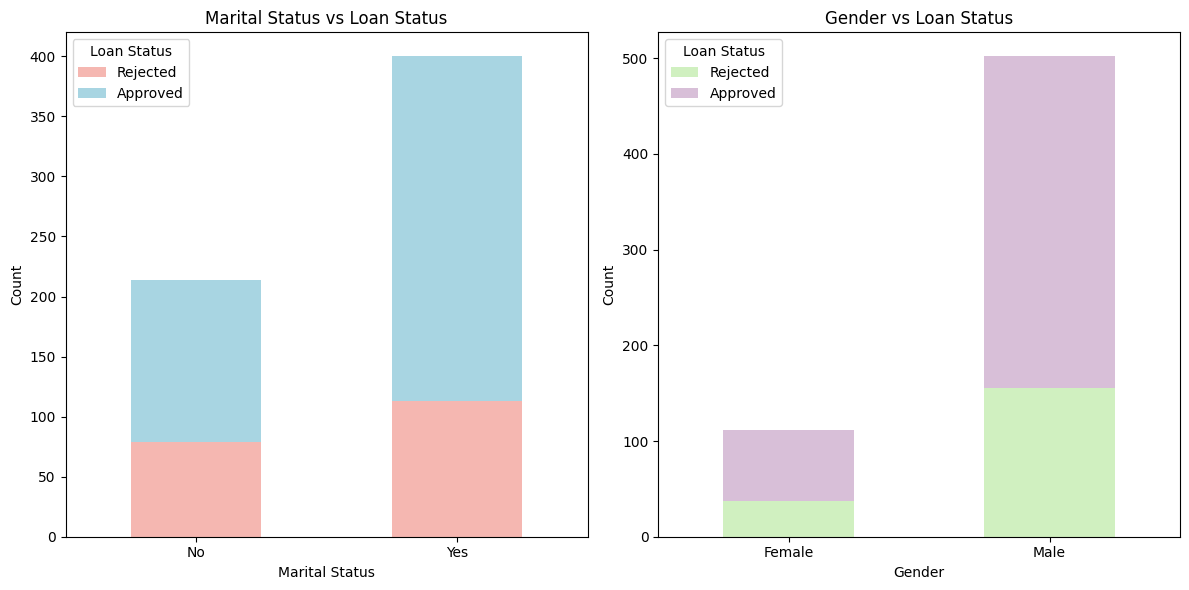

In [ ]:

# Create subplots
plt.figure(figsize=(12, 6))

# First subplot: Marital Status vs Loan Status
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
marital_loan_status = pd.crosstab(data['Married'], data['Status'])
ax = marital_loan_status.plot(kind='bar', stacked=True, color=['#f5b7b1', '#a8d5e2'], ax=plt.gca())
plt.title('Marital Status vs Loan Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])

# Second subplot: Gender vs Loan Status
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
gender_loan_status = pd.crosstab(data['Gender'], data['Status'])
ax = gender_loan_status.plot(kind='bar', stacked=True, color=['#D0F0C0', '#D8BFD8'], ax=plt.gca())
plt.title('Gender vs Loan Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
data.groupby('Married')['Status'].value_counts()
data.groupby('Gender')['Status'].value_counts()

Gender  Status
Female  Y          75
        N          37
Male    Y         347
        N         155
Name: count, dtype: int64

## Gender Breakdown

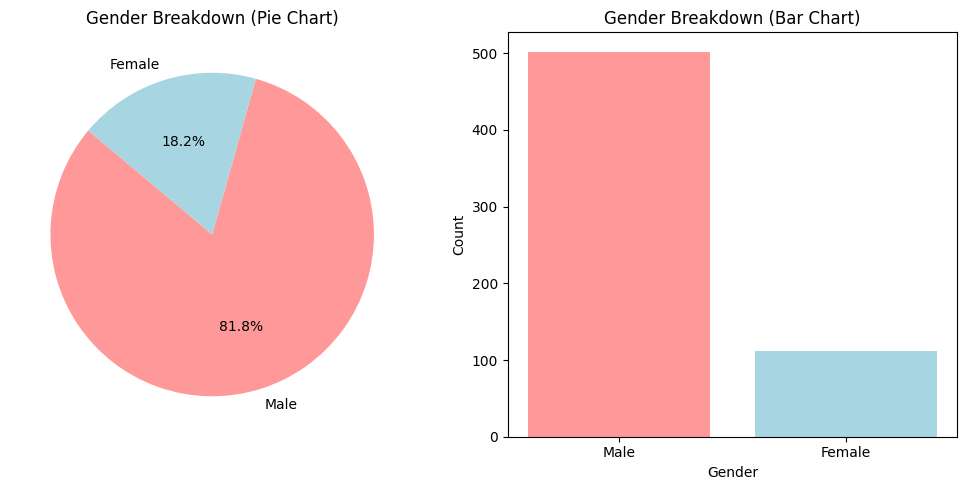

In [ ]:
gender_counts = data['Gender'].value_counts()

# Pie Chart
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#a8d5e2'], startangle=140)
plt.title('Gender Breakdown (Pie Chart)')

# Bar Chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.bar(gender_counts.index, gender_counts, color=['#ff9999','#a8d5e2'])
plt.title('Gender Breakdown (Bar Chart)')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Income vs. Loan Amount

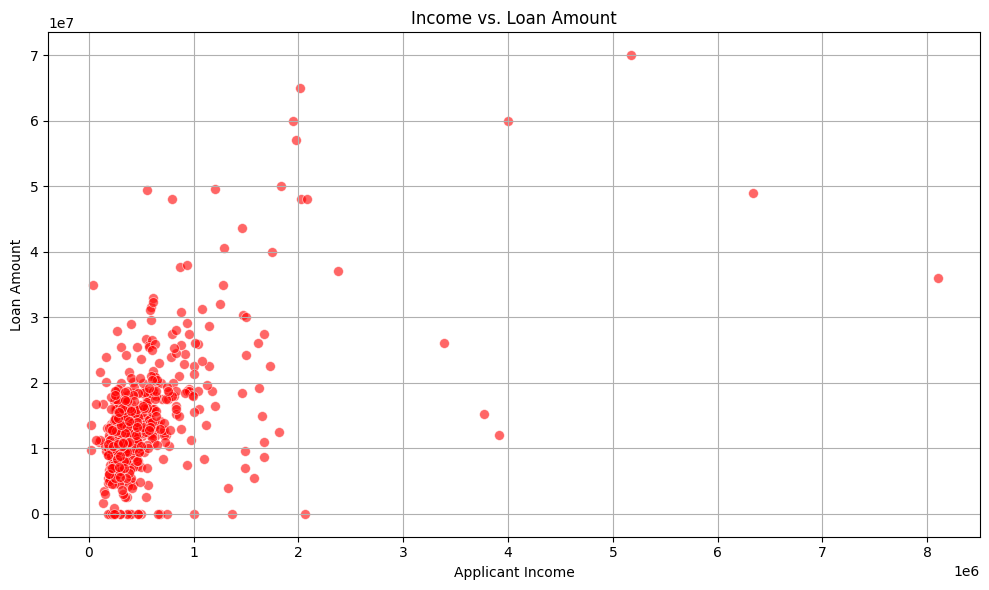

In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Applicant_Income', y='Loan_Amount', color='red', s=50, alpha=0.6)

# Adding titles and labels
plt.title('Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

## Education Level vs. Loan Amount

<ipython-input-470-a9c7571779cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Education', y='Loan_Amount', order=education_order, palette='pastel')


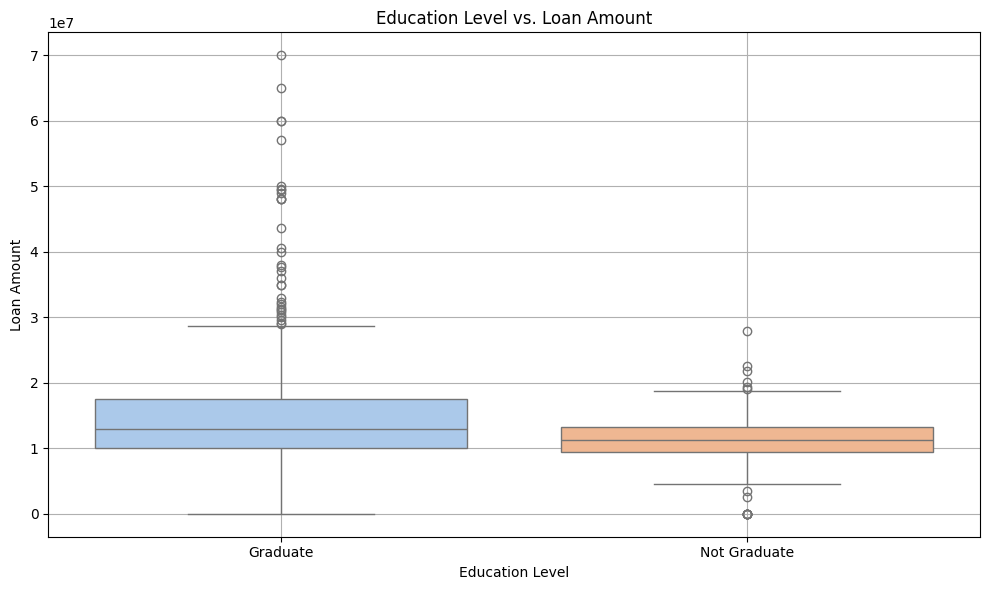

In [ ]:

# Define the order of education levels for plotting
education_order = ['Graduate', 'Not Graduate']

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Education', y='Loan_Amount', order=education_order, palette='pastel')

# Adding titles and labels
plt.title('Education Level vs. Loan Amount')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

## Number of Loans for Different Loan Terms

In [ ]:
data['Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

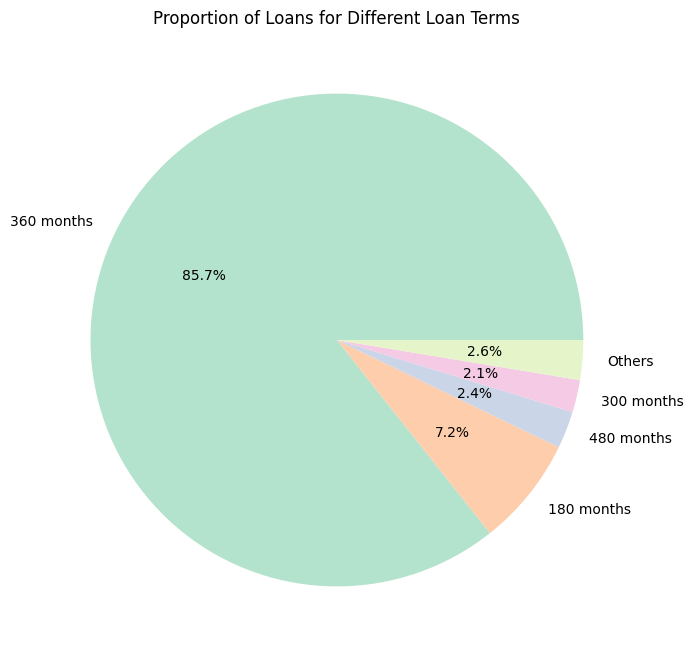

In [ ]:
# Replace numeric terms with descriptive labels
data['Term'] = data['Term'].replace({
    360.: '360 months',
    120.: '120 months',
    240.: '240 months',
    180.: '180 months',
    60.: '60 months',
    300.: '300 months',
    480.: '480 months',
    36.: '36 months',
    84.: '84 months',
    12.: '12 months'
})

# Count the number of loans for each loan term
term_counts = data['Term'].value_counts()

# Calculate proportions and filter out those less than 1%
total_count = term_counts.sum()
proportions = term_counts / total_count * 100
filtered_term_counts = term_counts[proportions >= 1]

# Aggregate terms with proportions less than 1% into 'Others'
other_count = term_counts[proportions < 1].sum()
filtered_term_counts = pd.concat([filtered_term_counts, pd.Series({'Others': other_count})])

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(filtered_term_counts, labels=filtered_term_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Pastel2').colors)

# Adding title
plt.title('Proportion of Loans for Different Loan Terms')

# Show plot
plt.show()


## Loan Status by Area

In [ ]:
data['Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
data.groupby('Area')['Status'].value_counts()

Area       Status
Rural      Y         110
           N          69
Semiurban  Y         179
           N          54
Urban      Y         133
           N          69
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

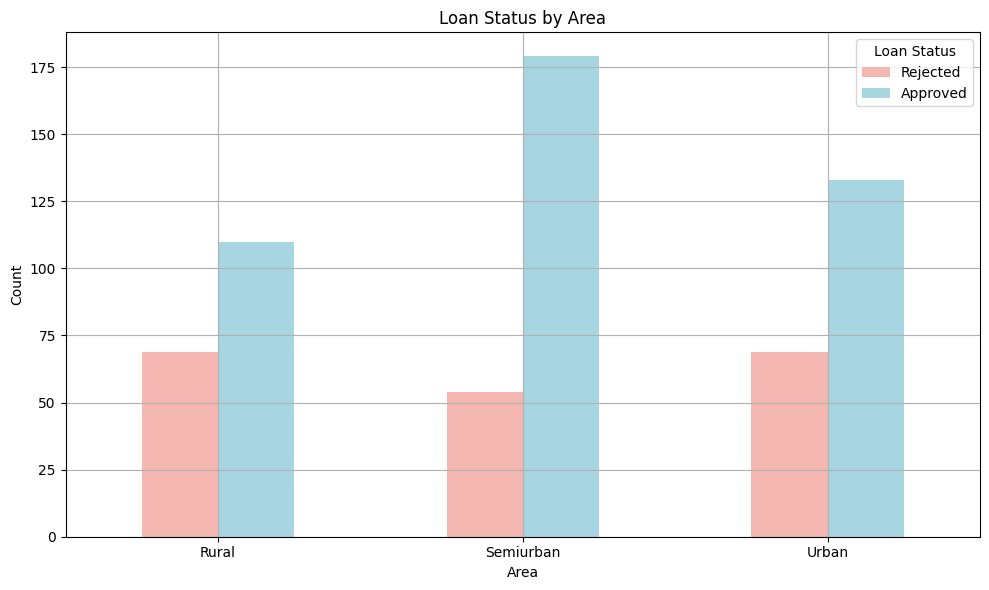

In [ ]:
# Create a crosstab of Area vs Loan Status
area_loan_status = pd.crosstab(data['Area'], data['Status'])

# Plotting the stacked column chart
plt.figure(figsize=(10, 6))

# Plot stacked column chart
ax = area_loan_status.plot(kind='bar', stacked=False, color=['#f5b7b1', '#a8d5e2'], figsize=(10, 6))

# Adding title and labels
plt.title('Loan Status by Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x labels horizontal

# Adding a legend
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Applicant Income Box Plot

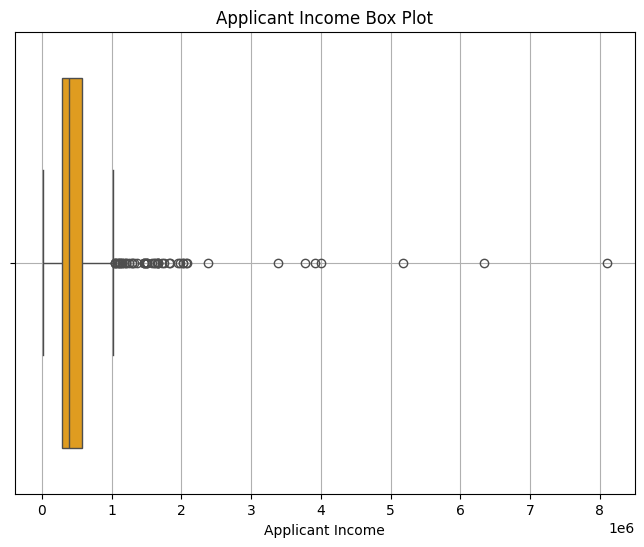

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Applicant_Income'], color='orange')
plt.title('Applicant Income Box Plot')
plt.xlabel('Applicant Income')
plt.grid(True)
plt.show()

## Distribution of Applicant Income

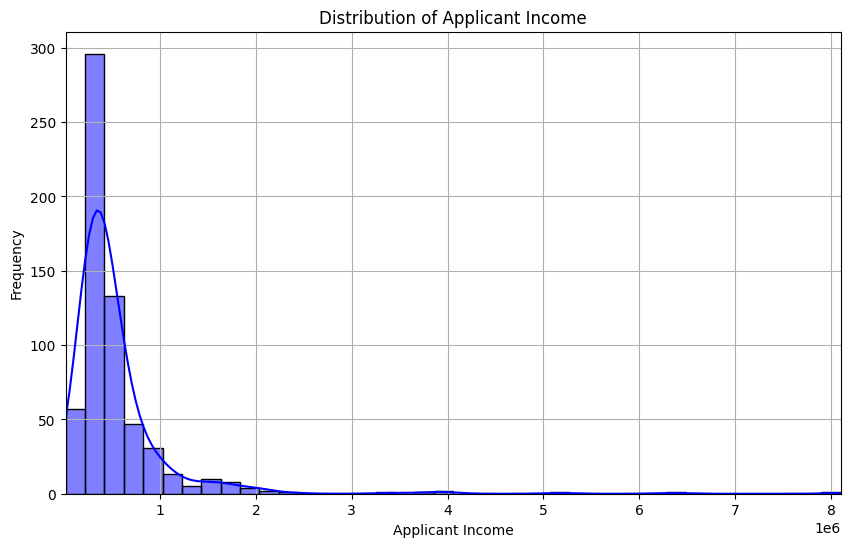

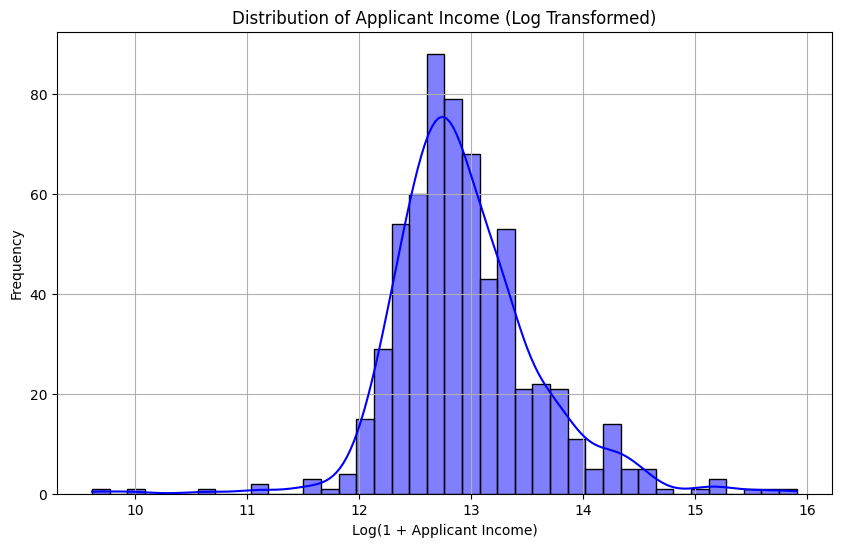

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Applicant_Income'], kde=True, bins=40, color='blue')
plt.xlim([data['Applicant_Income'].min(), data['Applicant_Income'].max()])
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(data['Applicant_Income']), kde=True, bins=40, color='blue')
plt.title('Distribution of Applicant Income (Log Transformed)')
plt.xlabel('Log(1 + Applicant Income)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

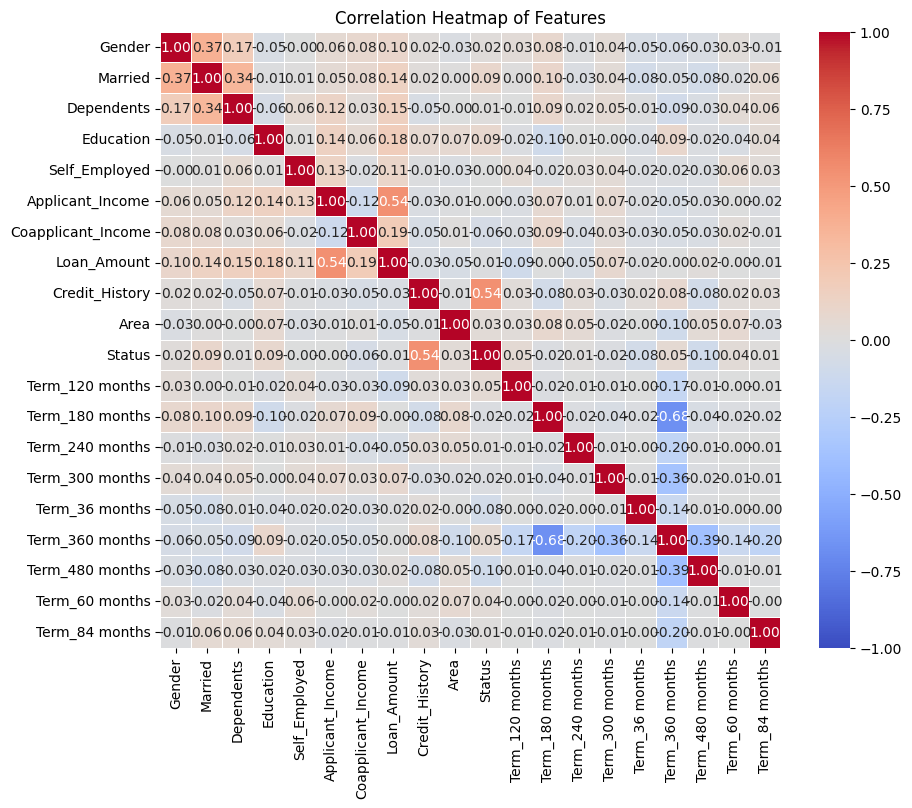

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].replace('3+',3)
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})
data['Area'] = data['Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Status']=data['Status'].map({'Y':1,'N':0})

# Convert categorical data to numerical (for heatmap purposes)
data_encoded = pd.get_dummies(data, columns=['Term'], drop_first=True)

# Compute the correlation matrix
correlation_matrix = data_encoded.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Adding title and labels
plt.title('Correlation Heatmap of Features')
plt.show()
